In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
t_train = pd.read_csv('/content/sample_data/Titanic_train.csv')

In [ ]:
t_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
'''
Data Decription:
PassengerId: Passenger Identity
Survived: 0 - dead, 1 - survived
Pclass : Class of ticket(1,2,3)
Sex : Sex of Passenger (Male and Female)
Age: Age of Passenger
SibSp: number of Sibling and/or Spouse travelling with passenger(0-8)
Parch: number of parents and/or children travelling with passenger(0-6)
Ticket : Ticket number
Fare : Ticket price
Cabin : type of cabin booked
Embarked : Boarded the titanic from C,Q,S (C-Cherbourg, Q-Queenstown, S- Southampton )
'''

'\nData Decription:\nPassengerId: Passenger Identity\nSurvived: 0 - dead, 1 - survived\nPclass : Class of ticket(1,2,3)\nSex : Sex of Passenger (Male and Female)\nAge: Age of Passenger\nSibSp: number of Sibling and/or Spouse travelling with passenger(0-8)\nParch: number of parents and/or children travelling with passenger(0-6)\nTicket : Ticket number\nFare : Ticket price\nCabin : type of cabin booked\nEmbarked : Boarded the titanic from C,Q,S (C-Cherbourg, Q-Queenstown, S- Southampton )\n'

In [ ]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# dropping columns Name,Ticket,Cabin. Name and ticket columns are not important for the analysis and cabin column has a lot of missing val

In [ ]:
t_train.drop({'Name','Cabin','Ticket'}, axis = 1, inplace = True)

In [ ]:
t_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df = t_train.set_index(t_train.columns[0])

In [ ]:
df.head()  #indexed first col - PassengerId

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(891, 8)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Combining col SibSp and Parch as Companion
df['Companion'] = df.SibSp + df.Parch

In [ ]:
df.Companion

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Name: Companion, Length: 891, dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Companion
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,1,3,female,26.0,0,0,7.9250,S,0
4,1,1,female,35.0,1,0,53.1000,S,1
5,0,3,male,35.0,0,0,8.0500,S,0


In [ ]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)  #deleting the col as they are now tranformed into a new col

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Companion
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0


In [ ]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age          177
Fare           0
Embarked       2
Companion      0
dtype: int64

In [ ]:
df.Age.value_counts(ascending = False).head(10)

Age
24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

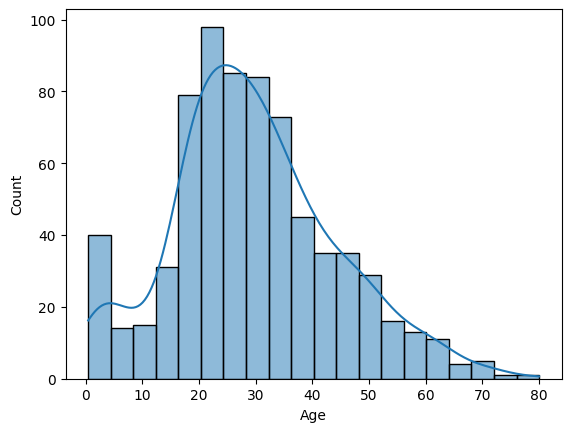

In [ ]:
sns.histplot(df.Age, bins=20, kde=True)

In [ ]:
# replacing null values in 'Age' and 'Embarked' columns

In [ ]:
# filling null vaues in age col with median of age
df.Age = df.Age.fillna(df.Age.median())

In [ ]:
# filling null value in Embarked Col with mode of embarked
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)

In [ ]:
df.isnull().sum()  #no null values

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Companion    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Companion  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


<Axes: xlabel='Age', ylabel='Count'>

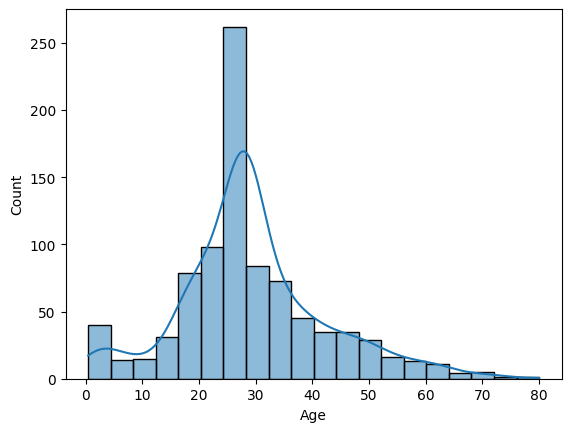

In [ ]:
sns.histplot(df.Age, bins=20, kde=True)  #after filling null values

In [ ]:
# label encoding sex and embarked col
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in ['Sex', 'Embarked']:
 df[col] =  le.fit_transform(df[col])

In [ ]:
# sex : Female-0, Male-1 ; Embarked: C-0, Q-1, S-2
df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Companion
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,2,1
2,1,1,0,38.0,71.2833,0,1
3,1,3,0,26.0,7.9250,2,0
4,1,1,0,35.0,53.1000,2,1
5,0,3,1,35.0,8.0500,2,0
6,0,3,1,28.0,8.4583,1,0
7,0,1,1,54.0,51.8625,2,0
8,0,3,1,2.0,21.0750,2,4
9,1,3,0,27.0,11.1333,2,2


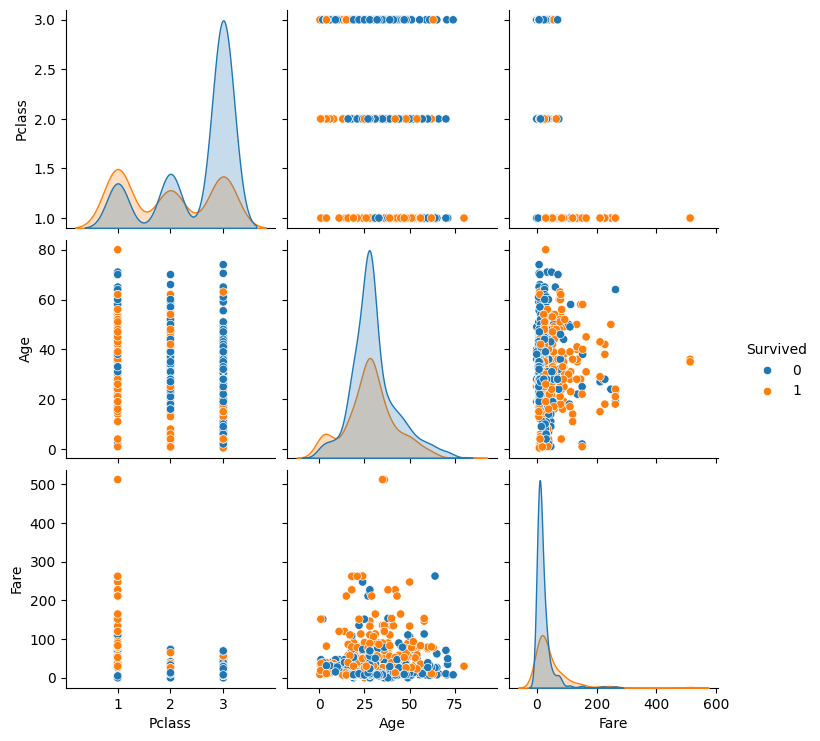

In [ ]:
sns.pairplot(data = df[['Pclass','Age','Fare','Survived']], hue= 'Survived')
plt.show()

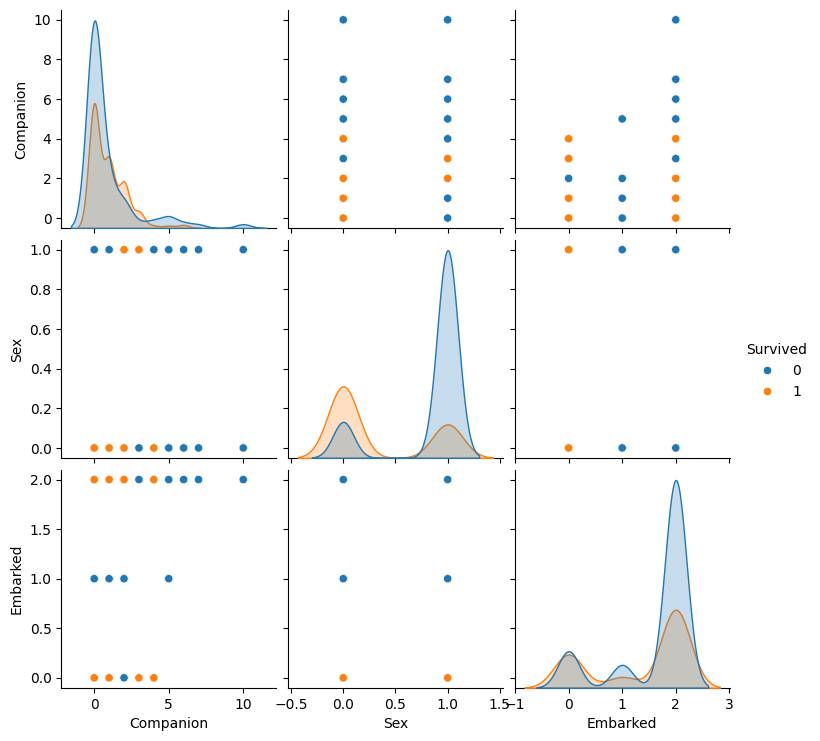

In [ ]:
sns.pairplot(df[['Companion','Sex','Embarked','Survived']], hue = 'Survived')
plt.show()

In [ ]:
'''
Observations:
1. Many people from Pclass 1 survived and most number of people from Pclass 3 died, indicating the effect of passenger class on survival rate.
2. People from Pclass 1 paid higher fare and showed greater rate of survival as compared to Pclass 3, where most of them died.
3. Most people in the age group 10-40 survived.
4. The people who paid low fare, died the most.
5. A huge number of males died and many females survived.
6. Many people boarding the cruise from Southampton died.
'''

'\nObservations:\n1. Many people from Pclass 1 survived and most number of people from Pclass 3 died, indicating the effect of passenger class on survival rate.\n2. People from Pclass 1 paid higher fare and showed greater rate of survival as compared to Pclass 3, where most of them died.\n3. Most people in the age group 10-40 survived.\n4. The people who paid low fare, died the most.\n5. A huge number of males died and many females survived.\n6. Many people boarding the cruise from Southampton died.\n'

<Axes: >

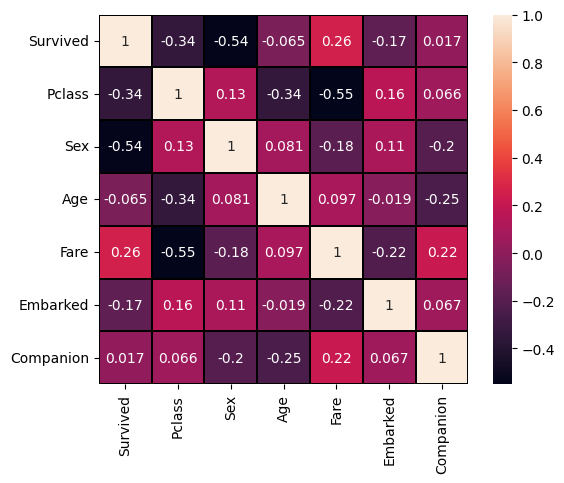

In [ ]:
#corr_matrix = df.corr()
sns.heatmap(df.corr(),annot = True, linewidth= .01,linecolor = 'black', square = True)

In [ ]:
'''
1. Pclass and Sex are negatively correlated with Survival rate
2. Fare and Survived are positively correlated.
3. Fare and Companion are positively correlated as the higher no. of people accompanying the passenger the more fare.

'''

'\n1. Pclass and Sex are negatively correlated with Survival rate\n2. Fare and Survived are positively correlated.\n3. Fare and Companion are positively correlated as the higher no. of people accompanying the passenger the more fare.\n\n'

In [ ]:
# target variable is Survived

In [ ]:
df.Survived.value_counts()   #Imbalanced Data

Survived
0    549
1    342
Name: count, dtype: int64

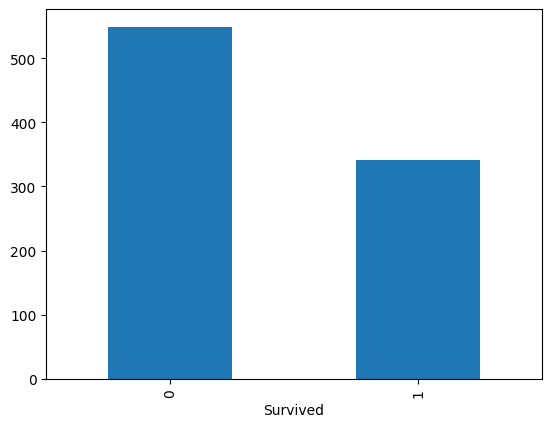

In [ ]:
df.Survived.value_counts().plot(kind='bar')
plt.show()

# Test Data

### making similar changes to test data as done to train data,so that the data is compatible.

In [ ]:
t_test = pd.read_csv('/content/sample_data/Titanic_test.csv',index_col = 'PassengerId')
t_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
t_test.drop({'Name','Cabin','Ticket'}, axis = 1, inplace = True)

In [ ]:
t_test['Companion'] = t_test.SibSp + t_test.Parch

In [ ]:
t_test.drop(['SibSp','Parch'],axis=1,inplace=True)  #deleting the col as they are now tranformed into a new col

In [ ]:
t_test.isnull().sum()

Pclass        0
Sex           0
Age          86
Fare          1
Embarked      0
Companion     0
dtype: int64

In [ ]:
# filling null vaues in age col with median of age
t_test.Age = t_test.Age.fillna(t_test.Age.median())

In [ ]:
t_test.Fare = t_test.Fare.fillna(t_test.Fare.median())

In [ ]:
t_test.isnull().sum()

Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Companion    0
dtype: int64

In [ ]:
# label encoding sex and embarked col
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for col in ['Sex', 'Embarked']:
 t_test[col] =  le.fit_transform(t_test[col])

In [ ]:
t_test.describe()

,Pclass,Sex,Age,Fare,Embarked,Companion
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.599282,35.576535,1.401914,0.839713
std,0.841838,0.481622,12.703770,55.850103,0.854496,1.519072
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,7.895800,1.000000,0.000000
50%,3.000000,1.000000,27.000000,14.454200,2.000000,0.000000
75%,3.000000,1.000000,35.750000,31.471875,2.000000,1.000000
max,3.000000,1.000000,76.000000,512.329200,2.000000,10.000000


In [ ]:
t_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    int64  
 2   Age        418 non-null    float64
 3   Fare       418 non-null    float64
 4   Embarked   418 non-null    int64  
 5   Companion  418 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


In [ ]:
t_test.shape

(418, 6)

# Logistic Regression

In [ ]:
x_train = df.drop(columns=['Survived'])
y_train = df.Survived

In [ ]:
x_test = t_test

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_resampled, y_resampled = smote.fit_resample(x_train,y_train)

In [ ]:
x_resampled.shape

(1098, 6)

In [ ]:
y_resampled.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
smote_model = LogisticRegression(random_state = 42)
smote_model.fit(x_resampled,y_resampled)

LogisticRegression(random_state=42)

In [ ]:
y_pred = smote_model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
#print(classification_report(y_test,y_pred))